## 랜덤 포레스트
 - 랜덤한 결정 트리(Decision Tree)를 여러개 엮은 모델
 - 트리 < 데이터(부트스트랩 (*중복이 될 수 있음))

In [1]:
# p119
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.target_names # 2진 분류 classification

array(['malignant', 'benign'], dtype='<U9')

In [4]:
# 결정 트리  vs, 랜덤 포레스트

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

In [18]:
df = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

In [19]:
df.score(X_test, y_test), rf.score(X_test, y_test)

(0.9020979020979021, 0.972027972027972)

In [22]:
import matplotlib.pyplot as plt

<BarContainer object of 30 artists>

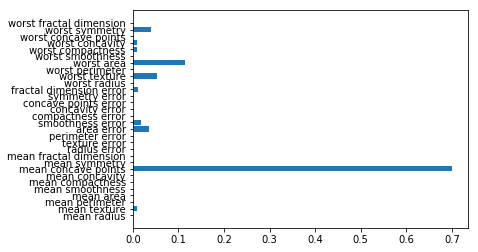

In [23]:
plt.barh(cancer.feature_names, df.feature_importances_)

<BarContainer object of 30 artists>

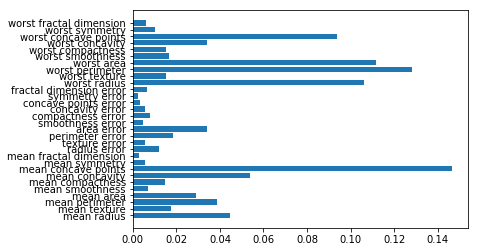

In [24]:
plt.barh(cancer.feature_names, rf.feature_importances_)

In [20]:
df.feature_importances_

array([0.        , 0.0096886 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.69955965, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03624125, 0.017502  ,
       0.        , 0.        , 0.        , 0.        , 0.01204155,
       0.        , 0.0520085 , 0.        , 0.11373562, 0.        ,
       0.00975173, 0.00995974, 0.        , 0.03951134, 0.        ])

In [21]:
rf.feature_importances_

array([0.04485178, 0.01767259, 0.03864456, 0.02912975, 0.00698383,
       0.01484882, 0.05384534, 0.14644747, 0.00579807, 0.00279219,
       0.01221226, 0.00563719, 0.01854921, 0.03424215, 0.00452888,
       0.00811587, 0.00565305, 0.00350983, 0.00237255, 0.00653918,
       0.10639136, 0.01527685, 0.128432  , 0.11156469, 0.01667323,
       0.0151899 , 0.03421365, 0.09370121, 0.01004997, 0.00613257])

## 그라디언트 부스팅 회귀 트리
- 트리 앙상블
- 랜덤포레스트 : 여러 나무를 서로 다른 데이터로 독립적으로 학습(병렬 가능)
- Gradient boosting decision tree : 나무 하나씩 순차적으로 학습, 이전 나무의 오류를 최소화 하는 방향으로 학습
    - 작은 나무 1~5개
        - 나무가 작다(max_depth 가 작고, leaf 가 적다) - 약한 학습기(weak learner)

In [25]:
# p122 보통 안정적인 랜덤 포레스트 먼저 사용, 더 성능을 높이고 싶을 때 xgboost(GradientBoostingClassifier) 사용
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
gbc = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

In [28]:
gbc.score(X_train, y_train), gbc.score(X_test, y_test)
# 과적합 > 트리를 작게 만들자 > 사전/사후 가지치기

(1.0, 0.958041958041958)

In [29]:
# max_depth를 낮게 -> 모델의 복잡도를 낮췄다
gbc = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)
gbc.score(X_train, y_train), gbc.score(X_test, y_test)

(0.9906103286384976, 0.972027972027972)

<BarContainer object of 30 artists>

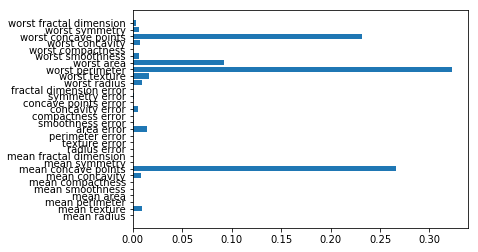

In [30]:
plt.barh(cancer.feature_names, gbc.feature_importances_)

## p131 에이다부스트(AdaBoost) : Adaptive Boosting
- 그라디언트 부스트 트리와 비슷.
- 차이 : 이전 트리의 오차를 최소화, 이전 트리의 오차 샘플에 가중치를 높여서 다음 트리에서 학습

In [31]:
# p132
from sklearn.ensemble import AdaBoostClassifier

In [32]:
adc = AdaBoostClassifier(random_state=0).fit(X_train, y_train)
adc.score(X_train, y_train), adc.score(X_test, y_test)

(1.0, 0.9790209790209791)

<BarContainer object of 30 artists>

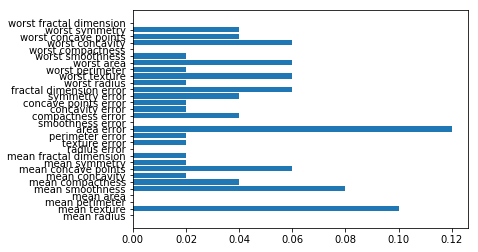

In [33]:
# 특성 중요도
plt.barh(cancer.feature_names, adc.feature_importances_)

- 결정 트리 -> 과적합 -> 앙상블(랜덤 포레스트, 그라디언트 부스팅 or 에이다 부스트)
- 최종 결정 : 분류 작업일 경우는 투표(다수결), 예측일 때는 평균

- p134 SVM(Support vector machine)
- p139 학습 : 데이터 포인트(샘플)가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 배운다

In [34]:
# p139
from sklearn.svm import SVC, SVR # SVM-C 분류용, SVM-R 회귀용
import mglearn

C:\Users\wtime\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\wtime\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


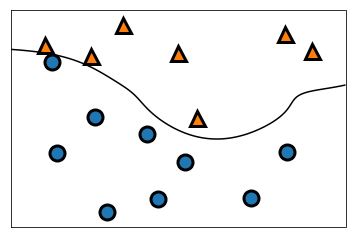

In [39]:
# p140
gamma = 1
c = 1 # 하나의 샘플이 미치는 영향의 범위, 작으면 넓은 범위(많은 샘플 : 일반화)
X, y = mglearn.tools.make_handcrafted_dataset() # 규제 regularization : 파라미터 값이 작아지도록 규제
svm = SVC(kernel='rbf', C =10, gamma = gamma).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps =.5)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)

In [41]:
sv = SVC(gamma='auto').fit(X_train, y_train)
sv.score(X_train, y_train), sv.score(X_test, y_test)
# 값을 정규화하면 95% 까지 상승, C를 올리면 97%

(1.0, 0.6293706293706294)

In [42]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

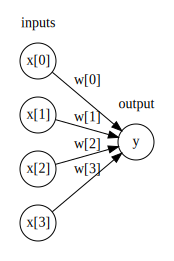

In [43]:
# logistic_regression
display(mglearn.plots.plot_logistic_regression_graph())

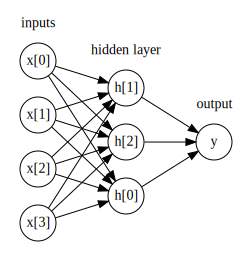

In [44]:
# 신경망(neural network) : 다층 퍼셉트론(multikayer perveptrons)
display(mglearn.plots.plot_single_hidden_layer_graph())

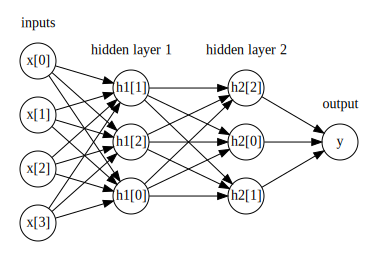

In [50]:
display(mglearn.plots.plot_two_hidden_layer_graph())
# 히든레이어가 없으면 Linear/Logistic regression
# 히든레이어가 1~3 면 신경망(MLP)
# 2000년 이후 히든레이어가 10~100~1000 많아진 모델을 딥 뉴럴 네트워크라고 합니다.

In [57]:
# p151
from sklearn.neural_network import MLPClassifier, MLPRegressor
mlp = MLPClassifier().fit(X_train, y_train)
mlp.score(X_train, y_train), mlp.score(X_test, y_test) # 과소적합 : under fitting

(0.9248826291079812, 0.9370629370629371)

In [58]:
# (3,3) 히든레이어 2개에 각각 노드 3개씩
mlp = MLPClassifier(hidden_layer_sizes=(100,50,50,50)).fit(X_train, y_train)
mlp.score(X_train, y_train), mlp.score(X_test, y_test)

# 장점: 모델 형태를 내 마음대로 설계, 최적의 형태일 때 성능 good
# 단점: 어떤 형태가 최선인가?, 학습 속도가 느리고, 분석이 까다롭다

(0.9178403755868545, 0.9300699300699301)

- KNN(예측/분류), Linear Regression(예측), Logistic Regression(분류)
- Decision Tree(예측/분류), Random Forest, Gradient Boost Decision Tree, AdaBoot,
SVM(SVM-C 분류용/SVM-R 예측용), MLP(뉴럴네트워크)